In [28]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
x = np.fromfile(r"/home/sms/vws/frappe/x.bin", dtype=np.float32)
X = np.reshape(x, (64, 1, 110, 256, 256))
video = X[0, :, :, :]

In [5]:
frame = video[:,11,:, :].squeeze()
#frame = np.stack((frame, frame, frame), axis=2)

In [76]:
def topil(tensor):
    uint8 = np.uint8(tensor*255)
    transform = transforms.ToPILImage(mode="RGB")
    return transform(uint8)
    
crop = transforms.CenterCrop((100, 100))
erase = transforms.RandomErasing(p=1, scale=(0.2, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)

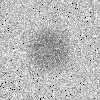

In [54]:
img = topil(frame)
crop(img)

In [107]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.RandomErasing(p=0.9, scale=(0.05, 0.2), ratio=(0.3, 3.3), value=0),
                                transforms.ToPILImage()
                                ])

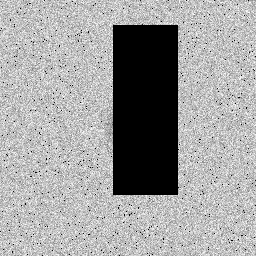

In [116]:
transform(topil(frame))

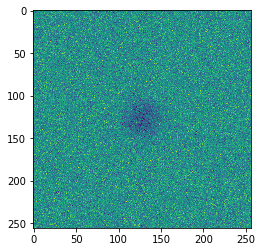

In [6]:
plt.imshow(frame)

In [41]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import preprocessing

In [65]:
frames = X[:, :, :, :, :].squeeze()

In [69]:
frames = np.reshape(frames, (7040, 256, 256))

In [70]:
frames_df = pd.DataFrame([])
for idx, frame in enumerate(frames):
    sample = pd.Series(frame.flatten(), name=idx)
    frames_df = frames_df.append(sample)
    
    
x = frames_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
frames_df = pd.DataFrame(x_scaled)

In [72]:
frames_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0.488677,0.526751,0.632103,0.439447,0.607883,0.708556,0.458895,0.367598,0.714093,0.453570,...,0.428806,0.588239,0.658666,0.410526,0.681713,0.545659,0.365795,0.764681,0.497099,0.682867
1,0.455342,0.377237,0.359139,0.591026,0.266746,0.448185,0.355748,0.477445,0.753874,0.521070,...,0.397010,0.455399,0.550394,0.490168,0.507574,0.596941,0.622074,0.613714,0.504687,0.639387
2,0.415301,0.477297,0.676355,0.619279,0.578727,0.575023,0.390198,0.417454,0.507281,0.555664,...,0.388523,0.422019,0.569160,0.656591,0.481388,0.720837,0.687943,0.574328,0.645713,0.495644
3,0.315224,0.593924,0.470105,0.548191,0.375028,0.468830,0.278139,0.593571,0.794866,0.386485,...,0.506793,0.462560,0.732472,0.257431,0.408456,0.271161,0.478746,0.505956,0.374990,0.507795
4,0.621800,0.363617,0.609569,0.765281,0.488177,0.550674,0.387001,0.598790,0.537352,0.531538,...,0.551179,0.529571,0.574777,0.438541,0.548728,0.553852,0.664501,0.645909,0.587256,0.644570


In [92]:
frames_PCA = PCA(n_components=0.9)
frames_PCA.fit(frames_df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

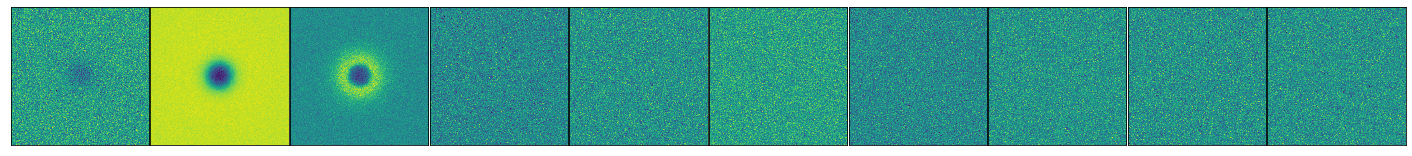

In [93]:
fig, axes = plt.subplots(1,10,figsize=(25,25),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(frames_PCA.components_[i].reshape(256,256))

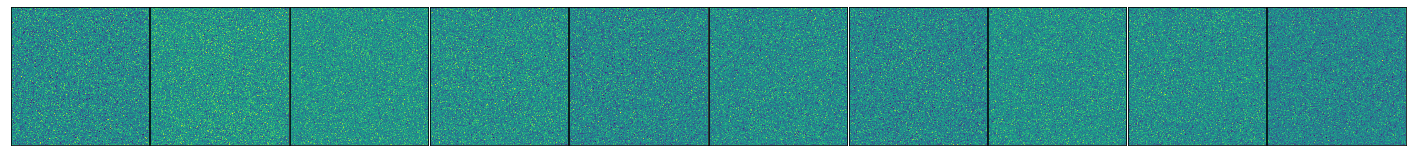

In [94]:
fig, axes = plt.subplots(1,10,figsize=(25,25),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(frames[i])

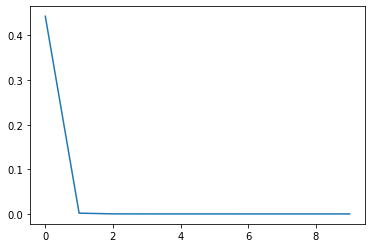

In [95]:
plt.plot(frames_PCA.explained_variance_ratio_[0:10])

In [59]:
frames_df = pd.DataFrame([])
for idx, frame in enumerate(frames):
    sample = pd.Series(frame.flatten(), name=idx)
    frames_df = frames_df.append(sample)

In [67]:
X.shape

(64, 1, 110, 256, 256)

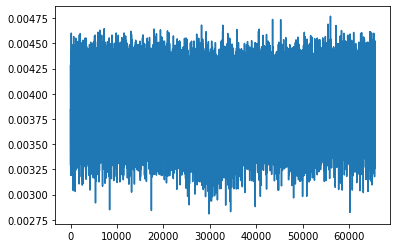

In [96]:
plt.plot(frames_PCA.components_[0])

In [86]:
scores = frames_PCA.transform(frames_df)

In [88]:
n_pcs= frames_PCA.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(frames_PCA.components_[i]).argmax() for i in range(n_pcs)]

In [91]:
plt.plot(frames_PCA.components_[most_important[0]])

IndexError: index 55967 is out of bounds for axis 0 with size 7040